In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore")

In [3]:
files=[file for file in os.listdir(r'C:\Users\Dell\OneDrive\Desktop\My Projects\Sales')]
for file in files:
    print(file)

All_Data.csv
Sales Analysis.ipynb
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
path = r"C:\Users\Dell\OneDrive\Desktop\My Projects\Sales"

# Get all CSV files in the directory
files = [f for f in os.listdir(path) if f.endswith('.csv')]

All_Data = pd.DataFrame()

for file in files:
    file_path = os.path.join(path, file)
    current_df = pd.read_csv(file_path)
    All_Data = pd.concat([All_Data, current_df], ignore_index=True)
    
print("Final dataframe shape:", All_Data.shape)

Final dataframe shape: (373699, 6)


In [5]:
# All_Data.to_csv(r"C:\Users\Dell\OneDrive\Desktop\My Projects\Sales\All_Data.csv", index=False)

In [6]:
All_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373699 entries, 0 to 373698
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


In [7]:
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
All_Data.isnull().sum()

Order ID            1089
Product             1089
Quantity Ordered    1089
Price Each          1089
Order Date          1089
Purchase Address    1089
dtype: int64

In [9]:
All_Data.dropna(inplace=True)
All_Data.reset_index(drop=True, inplace=True)
All_Data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
372605,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
372606,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
372607,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
372608,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [10]:
def month(x):
    return x.split('/')[0]

All_Data['Month']=All_Data['Order Date'].apply(month)
All_Data.dtypes

All_Data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [11]:
filter=All_Data['Month']=='Order Date'
len(All_Data[~filter])

371900

In [12]:
All_Data=All_Data[~filter]
All_Data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
256199,143653,USB-C Charging Cable,1,11.95,01/24/19 18:39,"116 5th St, Seattle, WA 98101",01
49258,313830,34in Ultrawide Monitor,1,379.99,12/26/19 22:57,"182 Church St, San Francisco, CA 94016",12
327967,283533,Google Phone,1,600,11/05/19 19:00,"349 9th St, Los Angeles, CA 90001",11
111266,168046,AAA Batteries (4-pack),1,2.99,03/31/19 18:11,"972 Lincoln St, Austin, TX 73301",03
111624,168393,27in 4K Gaming Monitor,1,389.99,03/02/19 17:52,"864 10th St, San Francisco, CA 94016",03


In [13]:
All_Data['Month']=All_Data['Month'].astype(int)
All_Data['Price Each']=All_Data['Price Each'].astype(float)
All_Data['Quantity Ordered']=All_Data['Quantity Ordered'].astype(int)
All_Data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [14]:
All_Data['Sales']=All_Data['Price Each']*All_Data['Quantity Ordered']
All_Data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
7714,183942,27in 4K Gaming Monitor,1,389.99,04/19/19 21:34,"458 Willow St, San Francisco, CA 94016",4,389.99
364511,251565,Apple Airpods Headphones,1,150.00,09/24/19 19:13,"507 Forest St, Portland, OR 97035",9,150.00
109946,166780,27in 4K Gaming Monitor,1,389.99,03/28/19 19:32,"348 Adams St, San Francisco, CA 94016",3,389.99
258444,145795,Macbook Pro Laptop,1,1700.00,01/28/19 18:49,"144 6th St, Atlanta, GA 30301",1,1700.00
191706,181736,iPhone,1,700.00,04/29/19 20:19,"119 Chestnut St, Portland, ME 04101",4,700.00


In [15]:
monthly_sales =All_Data.groupby('Month')['Sales'].sum().reset_index()
monthly_sales

,Month,Sales
0,1,3644513.46
1,2,4404044.84
2,3,5614200.76
3,4,6781340.48
4,5,6305213.50
5,6,5155604.52
6,7,5295551.52
7,8,4488935.76
8,9,4195120.26
9,10,7473453.76


In [16]:
# Avg sales 
print(f"Avg Sales is {monthly_sales['Sales'].mean():.2f}")

Avg Sales is 5748672.66


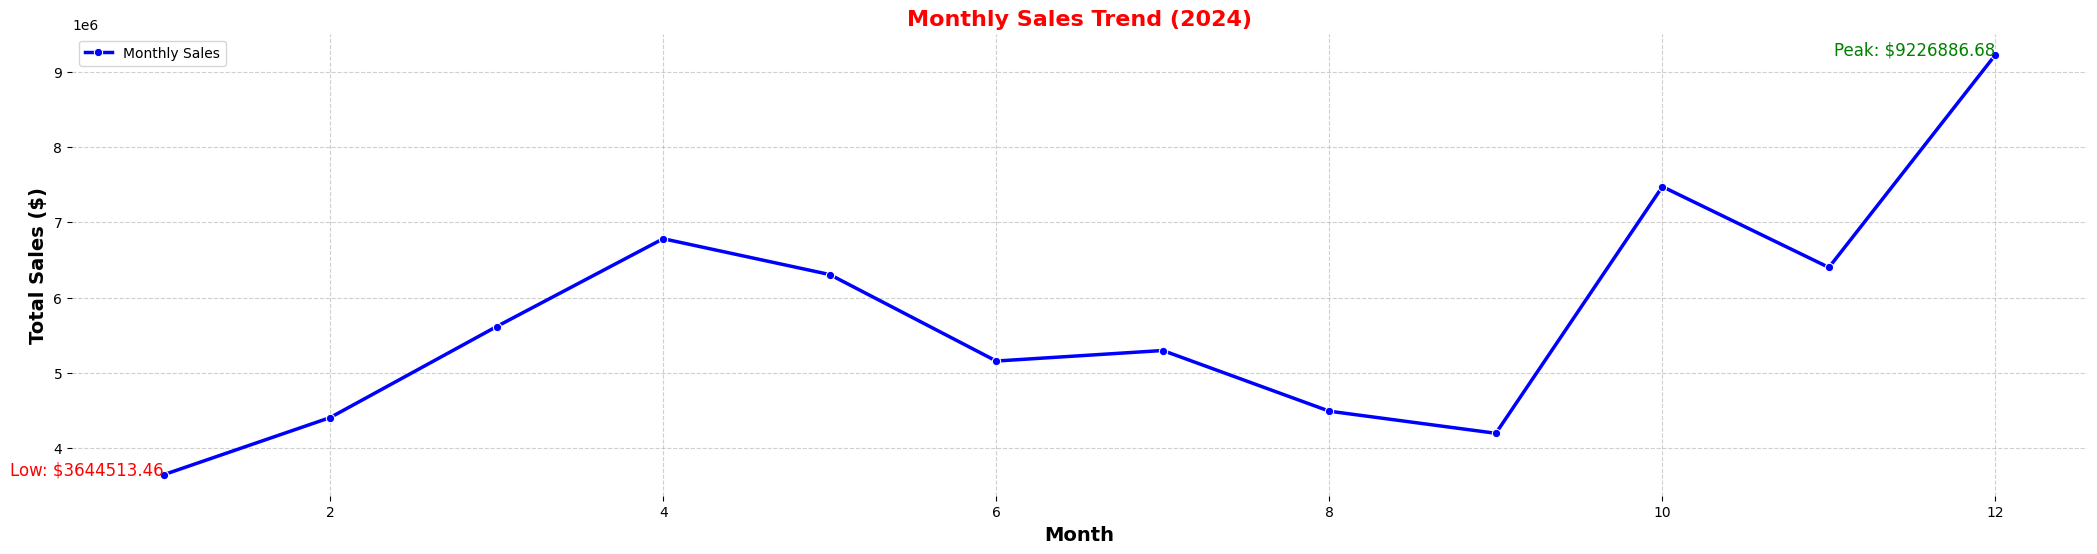

In [17]:
plt.figure(figsize=(26, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', linestyle='-', linewidth=2.5, color='b', label="Monthly Sales")

# Titles and labels
plt.title('Monthly Sales Trend (2024)', fontsize=16, fontweight='bold', color='r')
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=14, fontweight='bold')

# Highlight peak and low points
max_sales = monthly_sales['Sales'].max()
min_sales = monthly_sales['Sales'].min()
max_month = monthly_sales.loc[monthly_sales['Sales'].idxmax(), 'Month']
min_month = monthly_sales.loc[monthly_sales['Sales'].idxmin(), 'Month']

plt.text(max_month, max_sales, f'Peak: ${max_sales}', color='green', fontsize=12, ha='right')
plt.text(min_month, min_sales, f'Low: ${min_sales}', color='red', fontsize=12, ha='right')

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
sns.despine(left=True, bottom=True)
plt.show()


In [18]:
def city(x):
    return x.split(',')[1]
All_Data['City']=All_Data['Purchase Address'].apply(city)
All_Data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
12891,188887,AAA Batteries (4-pack),1,2.99,04/27/19 10:26,"756 Forest St, San Francisco, CA 94016",4,2.99,San Francisco
228972,307502,Bose SoundSport Headphones,1,99.99,12/12/19 11:18,"34 Hill St, Los Angeles, CA 90001",12,99.99,Los Angeles
336483,291681,AAA Batteries (4-pack),1,2.99,11/09/19 18:03,"67 North St, Atlanta, GA 30301",11,2.99,Atlanta
193817,183742,Lightning Charging Cable,1,14.95,04/20/19 07:16,"527 7th St, San Francisco, CA 94016",4,14.95,San Francisco
199878,189542,AA Batteries (4-pack),1,3.84,04/11/19 11:36,"527 Maple St, San Francisco, CA 94016",4,3.84,San Francisco


Text(0, 0.5, 'City')

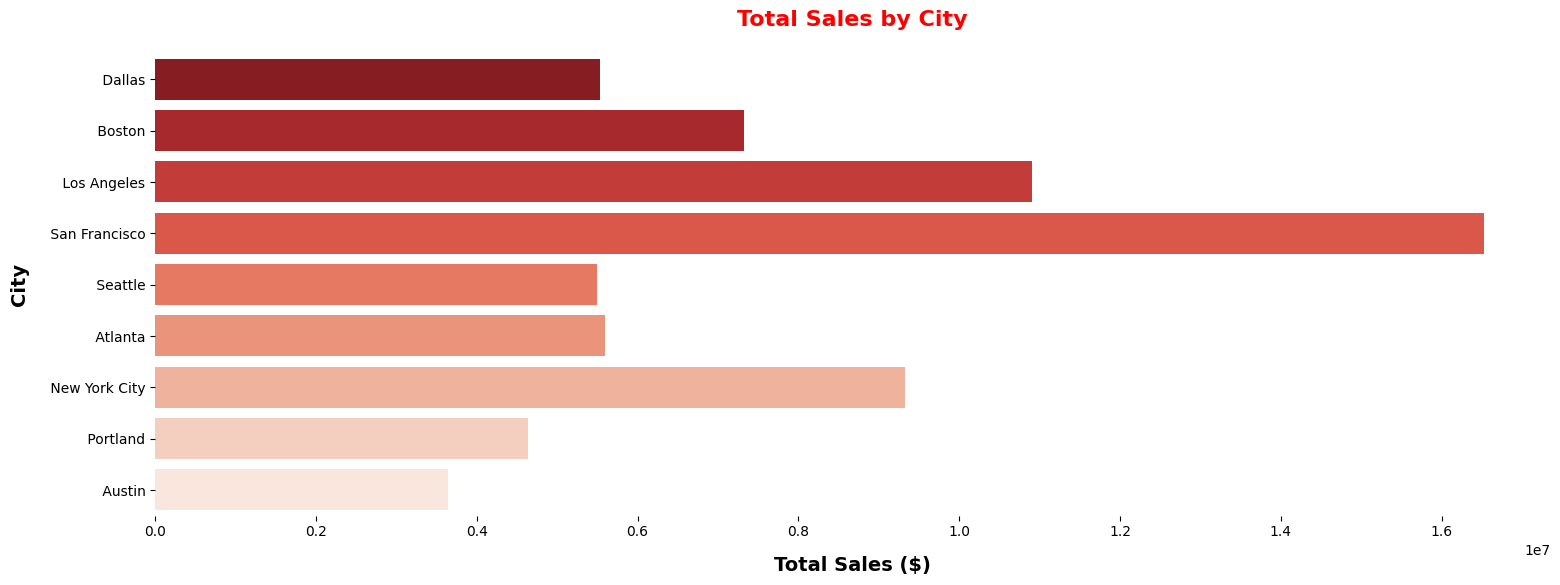

In [19]:
plt.figure(figsize=(18, 6))
sns.barplot(data=All_Data, y='City', x='Sales', estimator=sum, ci=None, palette='Reds_r')
sns.despine(left=True, bottom=True)
plt.title('Total Sales by City', fontsize=16, fontweight='bold', color='r', pad=20)
plt.xlabel('Total Sales ($)', fontsize=14, fontweight='bold',labelpad=12)
plt.ylabel('City', fontsize=14, fontweight='bold',labelpad=12)


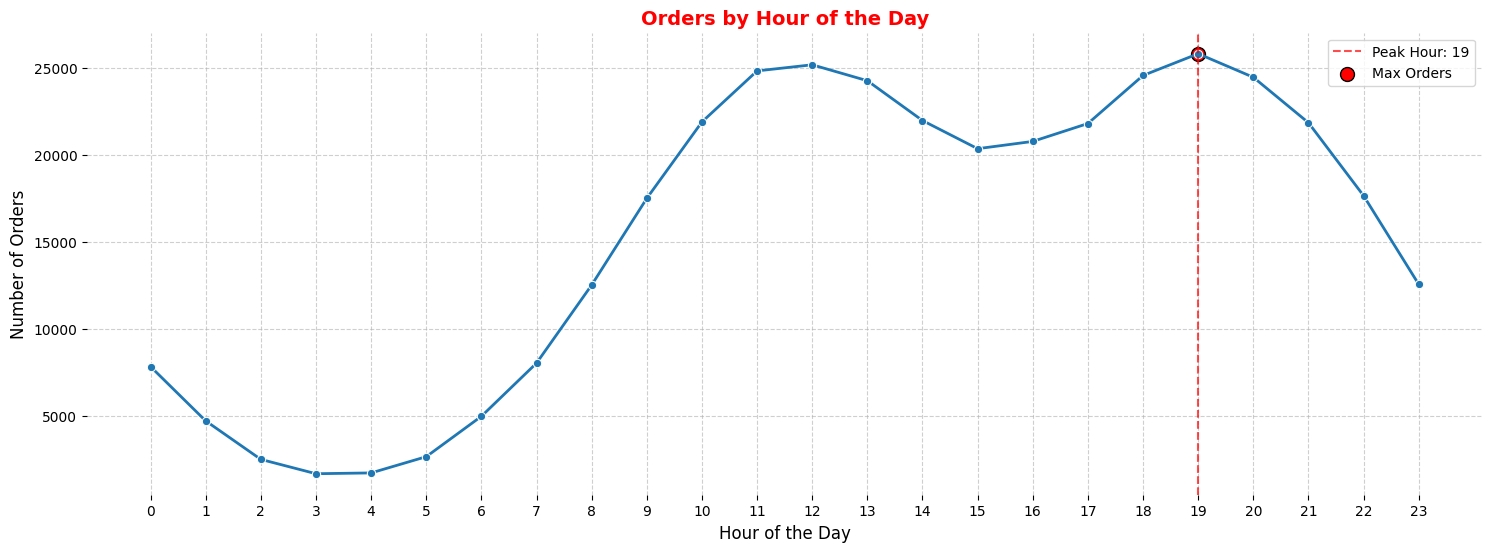

In [20]:
# Convert 'Order Date' to datetime and extract hours
All_Data['Order Date'] = pd.to_datetime(All_Data['Order Date'], errors='coerce')
All_Data['Hour'] = All_Data['Order Date'].dt.hour

# Count orders per hour
hourly_orders = All_Data.groupby('Hour').size().reset_index(name='Order Count')

# Find peak hour
peak_hour = hourly_orders.loc[hourly_orders['Order Count'].idxmax(), 'Hour']
peak_orders = hourly_orders['Order Count'].max()

# Plot
plt.figure(figsize=(18,6))
sns.lineplot(data=hourly_orders, x='Hour', y='Order Count', marker='o', linewidth=2)

# Highlight peak hour
plt.axvline(x=peak_hour, color='red', linestyle='--', alpha=0.7, label=f'Peak Hour: {peak_hour}')
plt.scatter([peak_hour], [peak_orders], color='red', s=100, label="Max Orders", edgecolor='black')

# Labels and Title
plt.title("Orders by Hour of the Day", fontsize=14, fontweight='bold', color='r')
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(range(0, 24))  # Ensure x-axis shows all hours
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine(left=True, bottom=True)
plt.show()


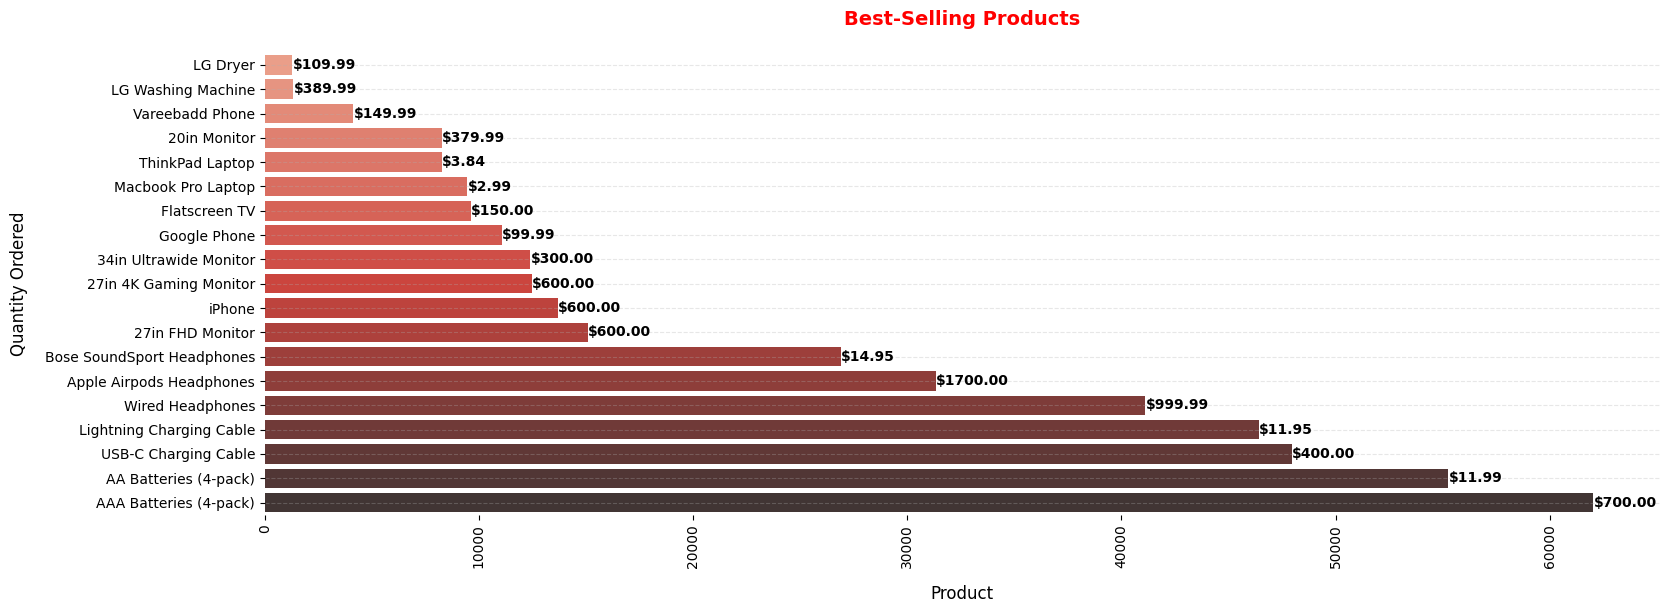

In [21]:
# Group by product and sum the quantity ordered
product_sales = All_Data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=True)

product_prices = All_Data.groupby('Product')['Price Each'].mean()

# Create a bar plot
plt.figure(figsize=(18,6))
bars = sns.barplot(y=product_sales.index, x=product_sales.values, palette="Reds_d")

# Annotate bars with product prices
for bar, price in zip(bars.patches, product_prices):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, f'${price:.2f}', 
             ha='left', va='center', fontsize=10, color='black', fontweight='bold')

# Labels and title
plt.xlabel("Product", fontsize=12,labelpad=12)
plt.ylabel("Quantity Ordered", fontsize=12,labelpad=12)
plt.title("Best-Selling Products", fontsize=14, fontweight='bold', color='r', pad=20)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine(left=True, bottom=True)
plt.show()

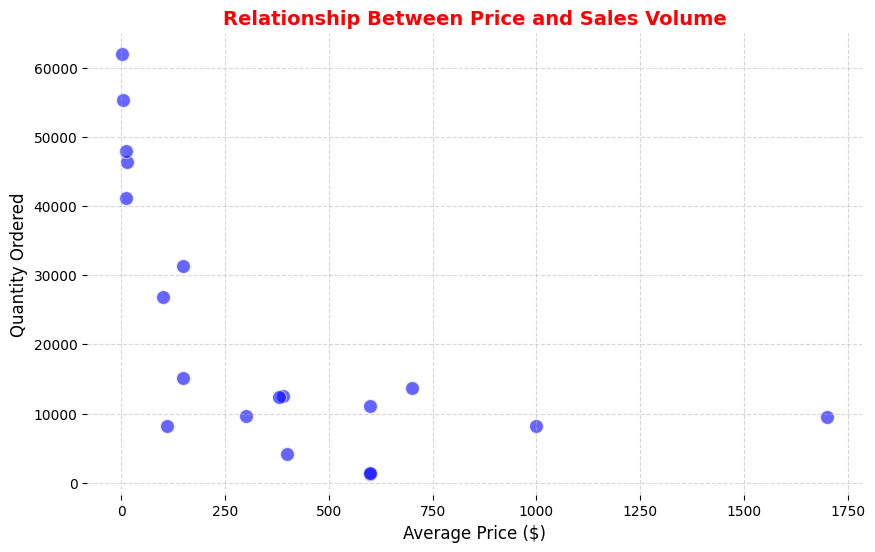

In [22]:
product_prices = All_Data.groupby('Product')['Price Each'].mean()
product_quantities = All_Data.groupby('Product')['Quantity Ordered'].sum()

plt.figure(figsize=(10,6))
sns.scatterplot(x=product_prices, y=product_quantities, color='blue', s=100, alpha=0.6)

plt.xlabel("Average Price ($)", fontsize=12)
plt.ylabel("Quantity Ordered", fontsize=12)
plt.title("Relationship Between Price and Sales Volume", fontsize=14, fontweight='bold', color='r')
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)
plt.show()


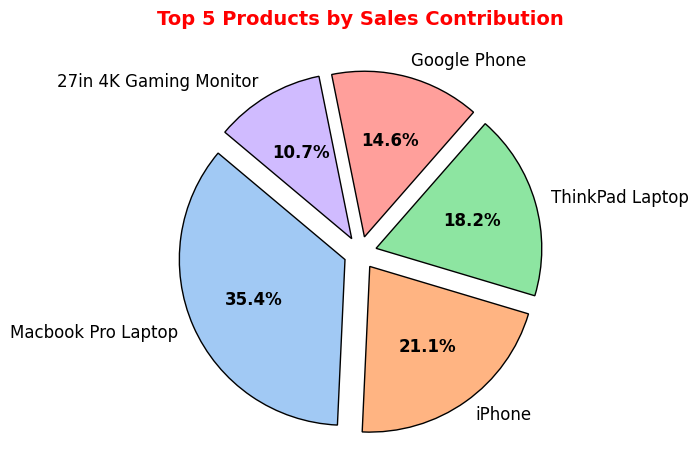

In [23]:
# Pie Chart: Top 5 Best-Selling Products by Sales Contribution
top_products = All_Data.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(5)
colors = sns.color_palette("pastel", len(top_products))
explode = [0.1, 0.1, 0.1, 0.1, 0.1]  # Explode all slices for emphasis

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    top_products, labels=top_products.index, autopct='%1.1f%%', startangle=140, 
    colors=colors, explode=explode, wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

# Improve text formatting
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

# Set title for pie chart
ax.set_title("Top 5 Products by Sales Contribution", fontsize=14, fontweight='bold', color='r', pad=15)

plt.tight_layout()
plt.show()

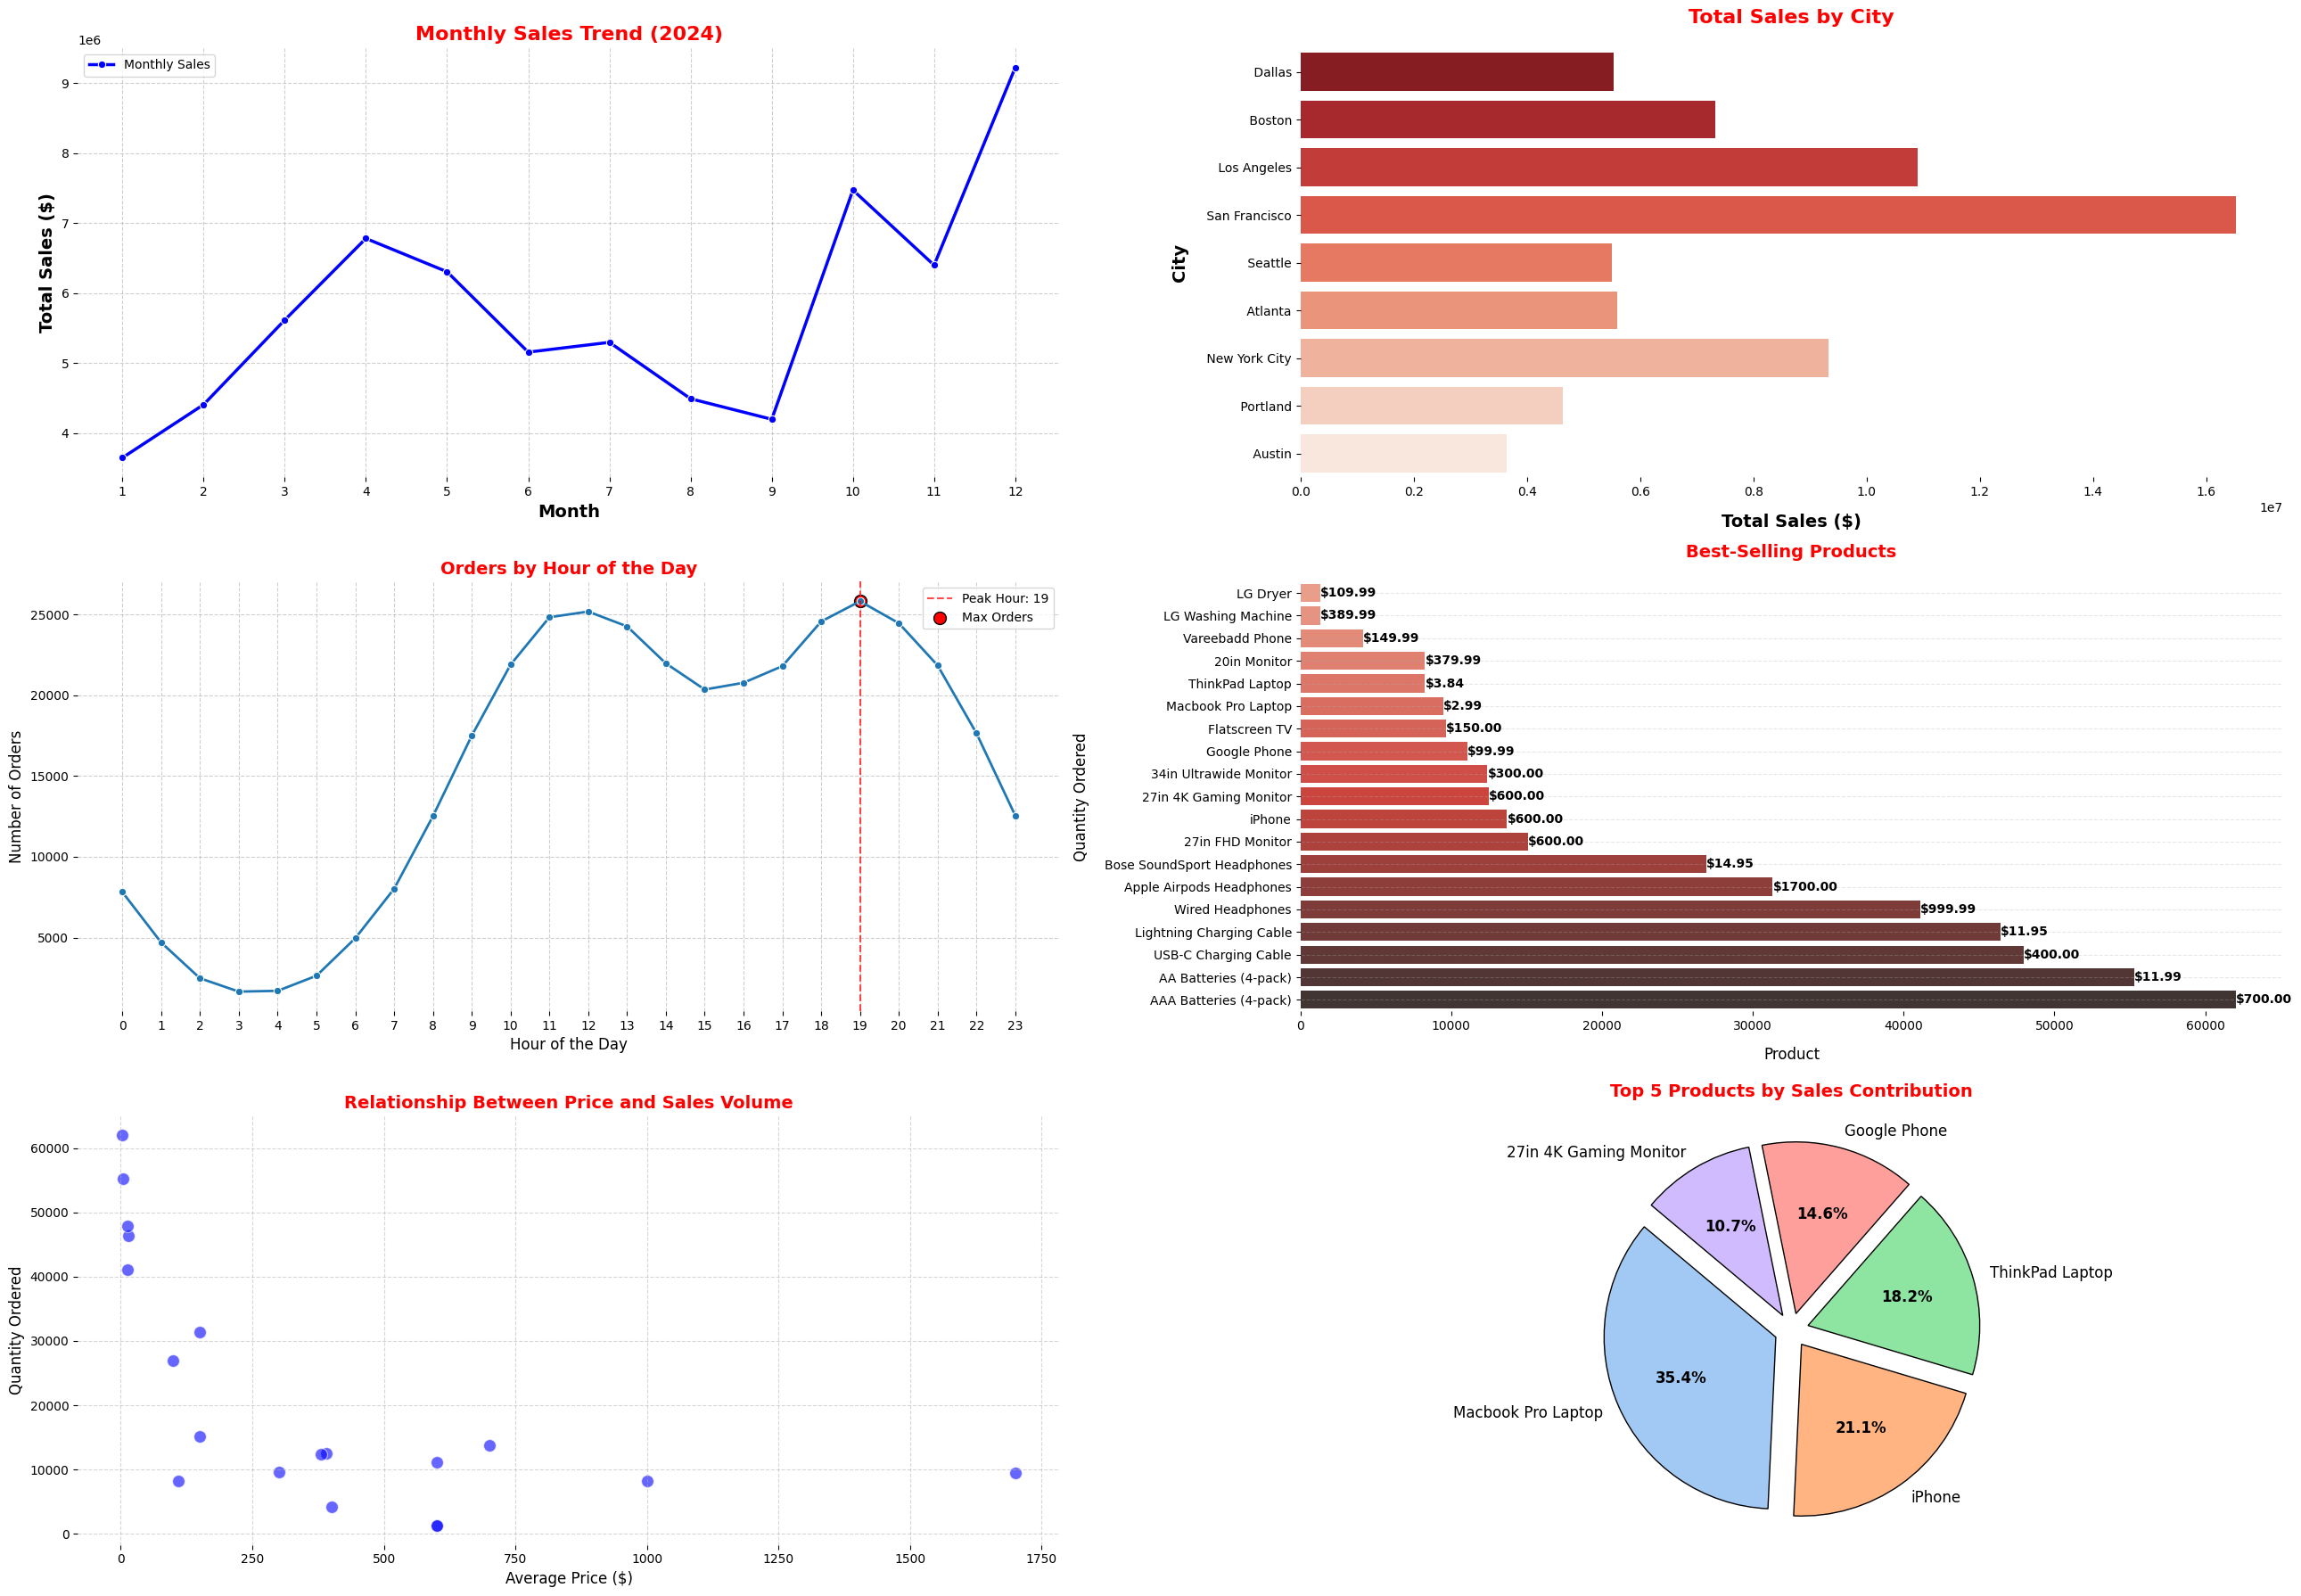

In [26]:
# Create a dashboard with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(26, 18))

# Convert Series to DataFrame
monthly_sales_df = monthly_sales.reset_index()
hourly_orders_df = hourly_orders.reset_index()
# hourly_orders_df.columns = ['Hour', 'Order Count']

# Monthly Sales Trend
sns.lineplot(data=monthly_sales_df, x='Month', y='Sales', marker='o', linestyle='-', linewidth=2.5, color='b', label="Monthly Sales", ax=axes[0, 0])
axes[0, 0].set_title('Monthly Sales Trend (2024)', fontsize=16, fontweight='bold', color='r')
axes[0, 0].set_xlabel('Month', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Total Sales ($)', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, linestyle='--', alpha=0.6)
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].legend()
sns.despine(left=True, bottom=True, ax=axes[0, 0])

# Total Sales by City
sns.barplot(data=All_Data, y='City', x='Sales', estimator=sum, ci=None, palette='Reds_r', ax=axes[0, 1])
axes[0, 1].set_title('Total Sales by City', fontsize=16, fontweight='bold', color='r', pad=20)
axes[0, 1].set_xlabel('Total Sales ($)', fontsize=14, fontweight='bold', labelpad=12)
axes[0, 1].set_ylabel('City', fontsize=14, fontweight='bold', labelpad=12)
sns.despine(left=True, bottom=True, ax=axes[0, 1])

# Orders by Hour
sns.lineplot(data=hourly_orders_df, x='Hour', y='Order Count', marker='o', linewidth=2, ax=axes[1, 0])
axes[1, 0].axvline(x=peak_hour, color='red', linestyle='--', alpha=0.7, label=f'Peak Hour: {peak_hour}')
axes[1, 0].scatter([peak_hour], [peak_orders], color='red', s=100, label="Max Orders", edgecolor='black')
axes[1, 0].set_title("Orders by Hour of the Day", fontsize=14, fontweight='bold', color='r')
axes[1, 0].set_xlabel("Hour of the Day", fontsize=12)
axes[1, 0].set_ylabel("Number of Orders", fontsize=12)
axes[1, 0].set_xticks(range(0, 24))
axes[1, 0].legend()
axes[1, 0].grid(True, linestyle='--', alpha=0.6)
sns.despine(left=True, bottom=True, ax=axes[1, 0])

sns.barplot(y=product_sales.index, x=product_sales.values, palette="Reds_d", ax=axes[1, 1])
for bar, price in zip(axes[1, 1].patches, product_prices):
    axes[1, 1].text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, f'${price:.2f}', 
                     ha='left', va='center', fontsize=10, color='black', fontweight='bold')
axes[1, 1].set_xlabel("Product", fontsize=12, labelpad=12)
axes[1, 1].set_ylabel("Quantity Ordered", fontsize=12, labelpad=12)
axes[1, 1].set_title("Best-Selling Products", fontsize=14, fontweight='bold', color='r', pad=20)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.3)
sns.despine(left=True, bottom=True, ax=axes[1, 1])

# Relationship Between Price and Sales Volume
sns.scatterplot(x=product_prices, y=product_quantities, color='blue', ax=axes[2, 0], s=100, alpha=0.6)
axes[2, 0].set_xlabel("Average Price ($)", fontsize=12)
axes[2, 0].set_ylabel("Quantity Ordered", fontsize=12)
axes[2, 0].set_title("Relationship Between Price and Sales Volume", fontsize=14, fontweight='bold', color='r')
axes[2, 0].grid(True, linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True, ax=axes[2, 0])

# Pie Chart: Top 5 Best-Selling Products by Sales Contribution
top_products = All_Data.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(5)
colors = sns.color_palette("pastel", len(top_products))
explode = [0.1, 0.1, 0.1, 0.1, 0.1]  # Explode all slices for emphasis
sns.despine(left=True, bottom=True, ax=axes[2, 1])
wedges, texts, autotexts = axes[2, 1].pie(
    top_products, labels=top_products.index, autopct='%1.1f%%', startangle=140, 
    colors=colors, explode=explode, wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

# Improve text formatting
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

# Set title for pie chart
axes[2, 1].set_title("Top 5 Products by Sales Contribution", fontsize=14, fontweight='bold', color='r', pad=15)

plt.tight_layout()
plt.show()
